In [ ]:
 from google.colab import drive 
drive.mount('/content/drive')
%cd drive/MyDrive/Final2/
!ls


Mounted at /content/drive
/content/drive/MyDrive/Final2
Transformer+TimeEmbedding.hdf5	Untitled0.ipynb  utils


In [ ]:



%load_ext autoreload
%reload_ext autoreload
%autoreload 2

from utils.get_data import get_data
from sklearn.metrics import mean_absolute_error,mean_squared_error
import matplotlib.pyplot as plt

df, X_train, y_train, X_val, y_val, X_test, y_test,train_data_len,val_data_len,scaler = get_data()
print(df.head())
print(df.tail())

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Training data shape: (1878, 5)
Validation data shape: (235, 5)
Test data shape: (234, 5)
Training set shape (1846, 32, 5) (1846,)
Validation set shape (203, 32, 5) (203,)
Testing set shape (202, 32, 5) (202,)
             High    Low   Open  Adj Close  Close
Date                                             
2012-01-03  11.25  10.99  11.00   7.544740  11.13
2012-01-04  11.53  11.07  11.15   7.659981  11.30
2012-01-05  11.63  11.24  11.33   7.856563  11.59
2012-01-06  11.80  11.52  11.74   7.937905  11.71
2012-01-09  11.95  11.70  11.83   7.998916  11.80
             High    Low   Open  Adj Close  Close
Date                                             
2021-04-26  12.44  12.23  12.28      12.27  12.27
2021-04-27  12.50  12.27  12.29      12.49  12.49
2021-04-28  12.60  12.39  12.60      12.43  12.43
2021-04-29  11.91  11.14  11.91      11.26  11.26
2021-04-30  11.54  11.33  11.36      11.54  11.54


Training data shape: (1878, 5)
Validation data shape: (235, 5)
Test data shape: (234, 5)
Training set shape (1846, 32, 5) (1846,)
Validation set shape (203, 32, 5) (203,)
Testing set shape (202, 32, 5) (202,)
Epoch 1/250
58/58 [==============================] - 15s 145ms/step - loss: 166.7315 - mae: 12.6564 - val_loss: 30.6999 - val_mae: 5.2482

Epoch 00001: val_loss improved from inf to 30.69991, saving model to Transformer+TimeEmbedding.hdf5
Epoch 2/250
58/58 [==============================] - 7s 125ms/step - loss: 78.6208 - mae: 8.1972 - val_loss: 20.5954 - val_mae: 4.2558

Epoch 00002: val_loss improved from 30.69991 to 20.59537, saving model to Transformer+TimeEmbedding.hdf5
Epoch 3/250
58/58 [==============================] - 7s 123ms/step - loss: 5.4121 - mae: 1.8561 - val_loss: 0.6662 - val_mae: 0.7058

Epoch 00003: val_loss improved from 20.59537 to 0.66623, saving model to Transformer+TimeEmbedding.hdf5
Epoch 4/250
58/58 [==============================] - 7s 121ms/step - loss

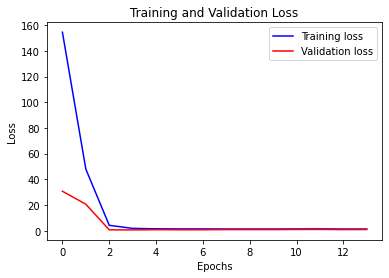

In [ ]:
from utils.get_model import get_model
from utils.train import train_model

n = 256
model = get_model(seq_len=32,
                  d_k = n, d_v = n,
                  n_heads = 12, ff_dim = n,
                  encoder_stack_size = 1, 
                  loss='mse', 
                  output_activation='linear')

train_model(model, epoches=250, batch=32)

In [ ]:
from utils.Time2Vector import Time2Vector
from utils.Attention import MultiAttention, SingleAttention
from utils.Encoder import TransformerEncoder
from tensorflow import keras
from keras.models import load_model
custom_objects = {"Time2Vector":Time2Vector,
                      "MultiAttention":MultiAttention,
                      'TransformerEncoder':TransformerEncoder}
with keras.utils.custom_object_scope(custom_objects):
      final_model=load_model('Transformer+TimeEmbedding.hdf5')
    